<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

## Crack growth analysis

### Hollow cylinder with crack on the external surface 

In [2]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
import py_fatigue.testing as test
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(TUTORIAL_PATH, "Data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"{pf.styling.TermColors.CWHITEBG}\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-6.5.0-1025-oem-x86_64-with-glibc2.35
Python version: 3.9.19 (main, Sep  2 2024, 18:33:51) 
[GCC 11.4.0]
py-fatigue version: 1.0.20

DATA_PATH = /home/pita/Projects/py_fatigue/Data
TUTORIAL_PATH = /home/pita/Projects/py_fatigue



In [4]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["serif"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

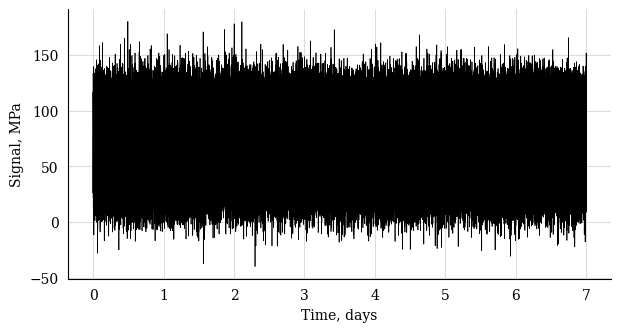

In [5]:
import py_fatigue.testing as test

time = test.get_sampled_time(duration=604800, fs=1)  # 1 week
stress = test.get_random_data(
    t=time, min_=-40, range_=220, random_type="normal", scale=1., seed=42
)
# Generating the timeseries dictionary
timeseries = {
    "data": stress,
    "time": time,
    "timestamp": datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc),
    "name": "One week time series",
    "range_bin_width":  5.0,
    "mean_bin_width":  5.0,
}

# concatenated timeseries plot
plt.plot(time / 86400, stress, 'k', lw=0.5)
plt.xlabel("Time, days")
plt.ylabel("Signal, MPa")
plt.show()



In [6]:
cc = pf.CycleCount.from_timeseries(**timeseries)
cc

,One week time series
Cycle counting object,
"largest full stress range, MPa",217.197668
"largest stress range, MPa",220.0
number of full cycles,201509
number of residuals,21
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,One week time series
Cycle counting object,
"largest full stress range, MPa",202.194963
"largest stress range, MPa",204.0
number of full cycles,201509
number of residuals,21
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,DNVGL-RP-C203: {'detail_factor': 0.6}


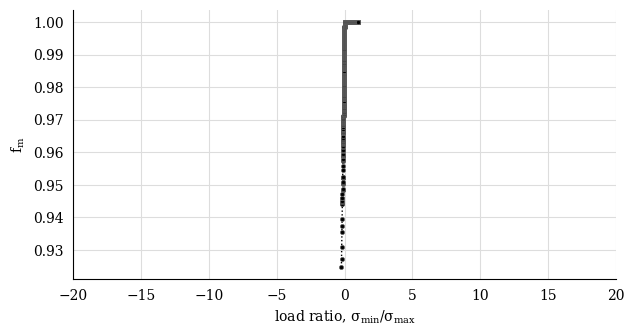

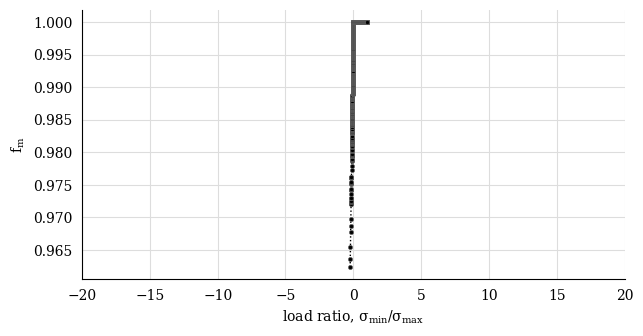

In [7]:
cc_corr_6 = cc.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.6,
)
cc_corr_8 = cc.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.8,
)
cc_corr_6

If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,One week time series
Cycle counting object,
"largest full stress range, MPa",132.832864
"largest stress range, MPa",133.950585
number of full cycles,201509
number of residuals,21
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,WALKER: {'gamma': 0.6}


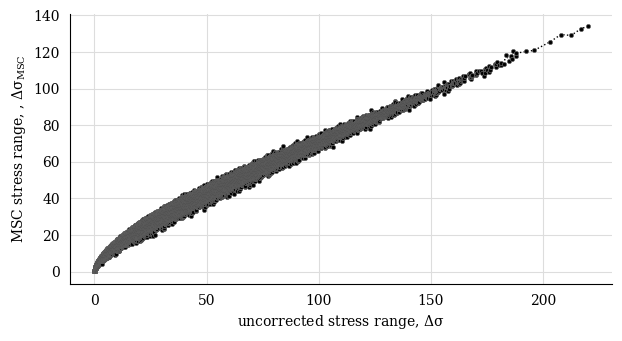

In [8]:
cc_corr_walk = cc.mean_stress_correction(
  correction_type = "walker",
  plot = True,
  gamma=0.6,
)
cc_corr_walk